In [1]:
import os

base_dir = '/content/data/pictures_process'
dirs = [
    'adaptequal_1_padded',
    'mask_multiclass'
]

# Création de l'arborescence
for d in dirs:
    os.makedirs(os.path.join(base_dir, d), exist_ok=True)

# Vérification
for root, subdirs, files in os.walk('/content/data'):
    print(root)
    for sub in subdirs:
        print('  ', sub)

/content/data
   pictures_process
   csv_raw
   .ipynb_checkpoints
/content/data/pictures_process
   mask_multiclass
   adaptequal_1_padded
/content/data/pictures_process/mask_multiclass
/content/data/pictures_process/adaptequal_1_padded
/content/data/csv_raw
/content/data/.ipynb_checkpoints


In [2]:
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

IMG_SIZE_ORIG = 960
IMG_SIZE = 240
MASK_RADIUS = 20  # pixels

def get_image_path(tomo_id):
    img_dir = './data/pictures_process/adaptequal_1_padded'
    return os.path.join(img_dir, f'{tomo_id}.jpg')

def get_mask_path(tomo_id):
    img_dir = './data/pictures_process/mask_multiclass'
    return os.path.join(img_dir, f'{tomo_id}.png')

def get_tomo_ids():
    folder = './data/pictures_process/mask_multiclass'
    file_list = [
        os.path.splitext(f)[0]
        for f in os.listdir(folder)
        if f.endswith('.png')
    ]
    return file_list

def get_xy(tomo_id):
    csv_path = './data/csv_raw/train_labels.csv'
    df = pd.read_csv(csv_path)
    y = df[df['tomo_id'] == tomo_id]['Motor_axis_1'].values[0]
    x = df[df['tomo_id'] == tomo_id]['Motor_axis_2'].values[0]
    return x, y

def rgba_mask_to_class_indices(mask_path, target_size=(IMG_SIZE, IMG_SIZE)):
    mask = Image.open(mask_path).convert('RGBA').resize(target_size, resample=Image.NEAREST)
    mask_np = np.array(mask)
    class_indices = np.zeros(mask_np.shape[:2], dtype=np.uint8)
    # Transparent (alpha == 0)
    class_indices[mask_np[..., 3] == 0] = 0
    # Rouge
    red = (mask_np[..., 0] > 127) & (mask_np[..., 1] < 127) & (mask_np[..., 2] < 127) & (mask_np[..., 3] > 0)
    class_indices[red] = 1
    # Vert
    green = (mask_np[..., 0] < 127) & (mask_np[..., 1] > 127) & (mask_np[..., 2] < 127) & (mask_np[..., 3] > 0)
    class_indices[green] = 2
    # Bleu
    blue = (mask_np[..., 0] < 127) & (mask_np[..., 1] < 127) & (mask_np[..., 2] > 127) & (mask_np[..., 3] > 0)
    class_indices[blue] = 3
    return class_indices

def load_data(ids):
    X = []
    Y_mask = []
    Y_motor_xy = []
    tomo_ids = []  # <-- Ajout ici

    for tomo_id in ids:
        if tomo_id in get_tomo_ids():
            image_path = get_image_path(tomo_id)
            mask_path = get_mask_path(tomo_id)
            img = load_img(image_path, color_mode='grayscale', target_size=(IMG_SIZE, IMG_SIZE))
            img_array = img_to_array(img) / 255.0
            img_rgb = np.repeat(img_array, 3, axis=-1)
            X.append(img_rgb)

            mask_array = rgba_mask_to_class_indices(mask_path, target_size=(IMG_SIZE, IMG_SIZE))
            Y_mask.append(mask_array)

            x, y = get_xy(tomo_id)
            Y_motor_xy.append([x*IMG_SIZE/IMG_SIZE_ORIG, y*IMG_SIZE/IMG_SIZE_ORIG])

            tomo_ids.append(tomo_id)  # <-- Ajout ici

    # Conversion en np.array
    npX = np.array(X, dtype=np.float32)
    npY_mask = np.array(Y_mask, dtype=np.float32)
    npY_motor_xy = np.array(Y_motor_xy, dtype=np.float32)

    result = {
        'X': npX,
        'Y': npY_mask,
        'motor_xy': npY_motor_xy,
        'tomo_ids': tomo_ids
    }

    return result


In [3]:

test_tomos_ids = ['tomo_dae195', 'tomo_f2fa4a', 'tomo_cabaa0', 'tomo_f7f28b', 'tomo_ed1c97', 'tomo_ff505c', 'tomo_8f4d60', 'tomo_2aeb29', 'tomo_651ecd', 'tomo_e96200', 'tomo_0d4c9e', 'tomo_2dcd5c', 'tomo_983fce', 'tomo_7b1ee3', 'tomo_8b6795', 'tomo_dcb9b4', 'tomo_e764a7', 'tomo_e26c6b', 'tomo_331130', 'tomo_f8b835', 'tomo_746d88', 'tomo_9cd09e', 'tomo_b9eb9a', 'tomo_cf0875', 'tomo_7cf523', 'tomo_fd41c4', 'tomo_54e1a7', 'tomo_ca472a', 'tomo_6478e5', 'tomo_e9b7f2', 'tomo_247826', 'tomo_675583', 'tomo_f0adfc', 'tomo_378f43', 'tomo_19a313', 'tomo_172f08', 'tomo_f3e449', 'tomo_3b83c7', 'tomo_8c13d9', 'tomo_2c607f', 'tomo_c11e12', 'tomo_412d88', 'tomo_4b124b', 'tomo_38c2a6', 'tomo_ec1314', 'tomo_1c38fd', 'tomo_e63ab4', 'tomo_f07244', 'tomo_210371', 'tomo_d6e3c7', 'tomo_935f8a', 'tomo_a4c52f', 'tomo_a46b26', 'tomo_fadbe2', 'tomo_b28579', 'tomo_35ec84', 'tomo_369cce', 'tomo_6c203d', 'tomo_b80310', 'tomo_640a74', 'tomo_22976c', 'tomo_d21396', 'tomo_ecbc12', 'tomo_040b80', 'tomo_85708b', 'tomo_b98cf6', 'tomo_e1e5d3', 'tomo_138018', 'tomo_3264bc', 'tomo_e50f04', 'tomo_d723cd', 'tomo_2a6ca2', 'tomo_1f0e78', 'tomo_67565e', 'tomo_fd5b38', 'tomo_05b39c', 'tomo_372a5c', 'tomo_c3619a', 'tomo_ba76d8', 'tomo_a67e9f', 'tomo_a6646f', 'tomo_db656f', 'tomo_4102f1', 'tomo_bb5ac1', 'tomo_4ed9de', 'tomo_61e947', 'tomo_1da0da', 'tomo_821255', 'tomo_3e7783', 'tomo_c84b46', 'tomo_974fd4', 'tomo_444829', 'tomo_b50c0f', 'tomo_2a6091', 'tomo_fa5d78', 'tomo_bdd3a0', 'tomo_1c2534', 'tomo_d916dc', 'tomo_bdc097', 'tomo_7036ee', 'tomo_cacb75', 'tomo_5b359d', 'tomo_7fa3b1', 'tomo_049310', 'tomo_dd36c9', 'tomo_e3864f', 'tomo_0a8f05', 'tomo_ff7c20', 'tomo_0fab19', 'tomo_1c75ac', 'tomo_d0699e', 'tomo_1e9980', 'tomo_4ee35e', 'tomo_6943e6', 'tomo_99a3ce']
val_tomos_ids = ['tomo_6f2c1f', 'tomo_dfc627', 'tomo_8d5995', 'tomo_cc2b5c', 'tomo_50cbd9', 'tomo_a72a52', 'tomo_9ae65f', 'tomo_9c0253', 'tomo_66285d', 'tomo_47d380', 'tomo_98686a', 'tomo_4077d8', 'tomo_97a2c6', 'tomo_ba9b3d', 'tomo_e2a336', 'tomo_aaa1fd', 'tomo_e8db69', 'tomo_532d49', 'tomo_f94504', 'tomo_5e2a91', 'tomo_2fc82d', 'tomo_16fce8', 'tomo_401341', 'tomo_0333fa', 'tomo_a81e01', 'tomo_b87c8e', 'tomo_e61cdf', 'tomo_b2ebbc', 'tomo_10c564', 'tomo_f71c16', 'tomo_47ac94', 'tomo_fea6e8', 'tomo_c00ab5', 'tomo_823bc7', 'tomo_278194', 'tomo_2fb12d', 'tomo_a537dd', 'tomo_19a4fd', 'tomo_417e5f', 'tomo_81445c', 'tomo_317656', 'tomo_7fbc49', 'tomo_806a8f', 'tomo_ab804d', 'tomo_957567', 'tomo_8634ee', 'tomo_fc1665', 'tomo_63e635', 'tomo_2645a0', 'tomo_5984bf', 'tomo_fc3c39', 'tomo_101279', 'tomo_08a6d6', 'tomo_0c2749', 'tomo_6607ec', 'tomo_23ce49', 'tomo_ca1d13', 'tomo_e55f81', 'tomo_bfd5ea', 'tomo_d7475d', 'tomo_136c8d', 'tomo_c4db00', 'tomo_ea3f3a', 'tomo_ef1a1a', 'tomo_2dd6bd', 'tomo_82d780', 'tomo_bede89', 'tomo_d5465a', 'tomo_e71210', 'tomo_9f1828', 'tomo_7550f4', 'tomo_efe1f8', 'tomo_bd42fa', 'tomo_01a877', 'tomo_59b470', 'tomo_0c3d78', 'tomo_d0c025', 'tomo_0eb41e', 'tomo_ca8be0', 'tomo_dbc66d', 'tomo_84997e', 'tomo_5dd63d', 'tomo_b9088c', 'tomo_24795a', 'tomo_6521dc', 'tomo_676744', 'tomo_cff77a', 'tomo_6f83d4', 'tomo_f78e91', 'tomo_6303f0', 'tomo_997437', 'tomo_cae587', 'tomo_9aee96', 'tomo_be9b98', 'tomo_97876d', 'tomo_e2da77', 'tomo_081a2d', 'tomo_cb5ec6', 'tomo_fc5ae4', 'tomo_4925ee', 'tomo_38d285', 'tomo_79a385', 'tomo_4469a7', 'tomo_05f919', 'tomo_568537', 'tomo_71ece1', 'tomo_85fa87', 'tomo_bcb115', 'tomo_2cace2', 'tomo_b4d92b', 'tomo_cc3fc4', 'tomo_94c173', 'tomo_a2a928', 'tomo_375513', 'tomo_40b215']
train_tomos_ids = ['tomo_c6f50a', 'tomo_288d4f', 'tomo_229f0a', 'tomo_decb81', 'tomo_39b15b', 'tomo_466489', 'tomo_d8c917', 'tomo_736dfa', 'tomo_03437b', 'tomo_066095', 'tomo_935ae0', 'tomo_c10f64', 'tomo_8e4919', 'tomo_2bb588', 'tomo_5bb31c', 'tomo_692081', 'tomo_ba37ec', 'tomo_20a9ed', 'tomo_b2b342', 'tomo_d396b5', 'tomo_b54396', 'tomo_122a02', 'tomo_4e3e37', 'tomo_9f918e', 'tomo_6cb0f0', 'tomo_f36495', 'tomo_e81143', 'tomo_6acb9e', 'tomo_56b9a3', 'tomo_dfdc32', 'tomo_98d455', 'tomo_2483bb', 'tomo_e5a091', 'tomo_91beab', 'tomo_b18127', 'tomo_73173f', 'tomo_221a47', 'tomo_5f1f0c', 'tomo_24a095', 'tomo_60d478', 'tomo_4f5a7b', 'tomo_975287', 'tomo_072a16', 'tomo_a8bf76', 'tomo_399bd9', 'tomo_512f98', 'tomo_4e38b8', 'tomo_146de2', 'tomo_423d52', 'tomo_711fad', 'tomo_b03f81', 'tomo_62dbea', 'tomo_a2bf30', 'tomo_25780f', 'tomo_8f5995', 'tomo_191bcb', 'tomo_372690', 'tomo_cf5bfc', 'tomo_f1bf2f', 'tomo_c678d9', 'tomo_cf53d0', 'tomo_c13fbf', 'tomo_e0739f', 'tomo_6d22d1', 'tomo_57c814', 'tomo_13973d', 'tomo_518a1f', 'tomo_dee783', 'tomo_556257', 'tomo_b11ddc', 'tomo_8e8368', 'tomo_e9fa5f', 'tomo_c649f8', 'tomo_517f70', 'tomo_622ca9', 'tomo_ac9fef', 'tomo_46250a', 'tomo_7eb641', 'tomo_bfdf19', 'tomo_6bb452', 'tomo_616f0b', 'tomo_f672c0', 'tomo_4c2e4e', 'tomo_9d3a0e', 'tomo_225d8f', 'tomo_d96d6e', 'tomo_5f34b3', 'tomo_93c0b4', 'tomo_464108', 'tomo_8554af', 'tomo_b24f1a', 'tomo_648adf', 'tomo_b7d94c', 'tomo_9ed470', 'tomo_db4517', 'tomo_3b8291', 'tomo_f427b3', 'tomo_f76529', 'tomo_5b087f', 'tomo_bc143f', 'tomo_774aae', 'tomo_b0e5c6', 'tomo_2f3261', 'tomo_b93a2d', 'tomo_ab78d0', 'tomo_c7b008', 'tomo_5764d6', 'tomo_2b996c', 'tomo_5308e8', 'tomo_e1a034', 'tomo_672101', 'tomo_0e9757', 'tomo_134bb0', 'tomo_643b20', 'tomo_d3bef7', 'tomo_f6de9b', 'tomo_8e58f1', 'tomo_4d528f', 'tomo_e72e60', 'tomo_0fe63f', 'tomo_a0cb00', 'tomo_221c8e', 'tomo_e57baf', 'tomo_02862f', 'tomo_738500', 'tomo_17143f', 'tomo_1446aa', 'tomo_0c3a99', 'tomo_8e4f7d', 'tomo_891afe', 'tomo_d0d9b6', 'tomo_aff073', 'tomo_0308c5', 'tomo_db2a10', 'tomo_d634b7', 'tomo_813916', 'tomo_30d4e5', 'tomo_6f0ee4', 'tomo_23c8a4', 'tomo_4f379f', 'tomo_37076e', 'tomo_37c426', 'tomo_fbb49b', 'tomo_e7c195', 'tomo_455dcd', 'tomo_fd9357', 'tomo_3eb9c8', 'tomo_cd1a7c', 'tomo_16136a', 'tomo_6a84b7', 'tomo_918e2b', 'tomo_c36b4b', 'tomo_f871ad', 'tomo_df866a', 'tomo_6733fa', 'tomo_3c6038', 'tomo_85edfd', 'tomo_4e41c2', 'tomo_9fc2b6', 'tomo_05df8a', 'tomo_7f0184', 'tomo_1cc887', 'tomo_06e11e', 'tomo_16efa8', 'tomo_8d231b', 'tomo_78b03d', 'tomo_32aaa7', 'tomo_1fb6a7', 'tomo_ac4f0d', 'tomo_971966', 'tomo_fb6ce6', 'tomo_50f0bf', 'tomo_285454', 'tomo_4b59a2', 'tomo_69d7c9', 'tomo_3183d2', 'tomo_2c9da1', 'tomo_d23087', 'tomo_3b7a22', 'tomo_4baff0', 'tomo_adc026', 'tomo_e5ac94', 'tomo_307f33', 'tomo_94a841', 'tomo_285d15', 'tomo_6bc974', 'tomo_51a47f', 'tomo_1dc5f9', 'tomo_7e3494', 'tomo_08bf73', 'tomo_0eb994', 'tomo_7dc063', 'tomo_79756f', 'tomo_6c5a26', 'tomo_76a42b', 'tomo_fb08b5', 'tomo_139d9e', 'tomo_e32b81', 'tomo_12f896', 'tomo_1af88d', 'tomo_603e40', 'tomo_f82a15', 'tomo_0f9df0', 'tomo_539259', 'tomo_fe85f6', 'tomo_fe050c', 'tomo_d31c96', 'tomo_c38e83', 'tomo_b10aa4', 'tomo_d83ff4', 'tomo_d5aa20', 'tomo_bbe766', 'tomo_305c97', 'tomo_5b8db4', 'tomo_5d798e', 'tomo_c8f3ce', 'tomo_881d84', 'tomo_da38ea', 'tomo_d0aa3b', 'tomo_abac2e', 'tomo_183270', 'tomo_51a77e', 'tomo_516cdd', 'tomo_c9d07c', 'tomo_656915', 'tomo_7dcfb8', 'tomo_a4f419', 'tomo_c4bfe2', 'tomo_eb4fd4', 'tomo_1ab322', 'tomo_6b1fd3', 'tomo_9dbc12', 'tomo_8e30f5', 'tomo_033ebe', 'tomo_a3ed10', 'tomo_4555b6', 'tomo_6e237a', 'tomo_5b34b2', 'tomo_3e6ead', 'tomo_891730', 'tomo_6df2d6', 'tomo_769126', 'tomo_95c0eb', 'tomo_bebadf', 'tomo_5f235a', 'tomo_3a3519', 'tomo_23a8e8', 'tomo_651ec2', 'tomo_3b1cc9', 'tomo_91c84c', 'tomo_a1a9a3', 'tomo_8ee8fd', 'tomo_28f9c1', 'tomo_67ff4e', 'tomo_acadd7', 'tomo_d2b1bc', 'tomo_53e048', 'tomo_a75c98', 'tomo_abb45a', 'tomo_493bea', 'tomo_0363f2', 'tomo_2c8ea2', 'tomo_30b580', 'tomo_a37a5c', 'tomo_569981', 'tomo_d84544', 'tomo_e685b8', 'tomo_ede779', 'tomo_b8595d', 'tomo_180bfd', 'tomo_4e478f', 'tomo_c596be', 'tomo_89d156', 'tomo_9f424e', 'tomo_71d2c0', 'tomo_646049', 'tomo_13484c', 'tomo_95e699', 'tomo_c36baf', 'tomo_9f222a', 'tomo_72b187', 'tomo_6a6a3b', 'tomo_91031e', 'tomo_abbd3b', 'tomo_7a9b64', 'tomo_868255', 'tomo_1efc28', 'tomo_319f79', 'tomo_256717', 'tomo_72763e', 'tomo_385eb6', 'tomo_3a0914', 'tomo_e34af8', 'tomo_4c1ca8', 'tomo_2acf68', 'tomo_24fda8', 'tomo_bad724', 'tomo_e51e5e', 'tomo_4e1b18', 'tomo_374ca7', 'tomo_9674bf', 'tomo_098751', 'tomo_c925ee', 'tomo_bde7f3', 'tomo_122c46', 'tomo_53c71b', 'tomo_e2ccab', 'tomo_68e123', 'tomo_9986f0', 'tomo_8e90f9', 'tomo_cc65a9', 'tomo_57592d', 'tomo_80bf0f', 'tomo_d9a2af', 'tomo_00e047', 'tomo_2a89bb', 'tomo_c4a4bb', 'tomo_0da370', 'tomo_6c4df3', 'tomo_47c399', 'tomo_9997b3', 'tomo_db6051', 'tomo_510f4e', 'tomo_60ddbd', 'tomo_bb9df3', 'tomo_79d622', 'tomo_499ee0', 'tomo_087d64', 'tomo_49f4ee', 'tomo_f8b46e', 'tomo_d2339b', 'tomo_2e1f4c', 'tomo_2c9f35', 'tomo_0a180f', 'tomo_a910fe', 'tomo_9cde9d', 'tomo_b7becf', 'tomo_d6c63f', 'tomo_be4a3a', 'tomo_c46d3c', 'tomo_161683', 'tomo_a020d7', 'tomo_b4d9da', 'tomo_513010', 'tomo_8f063a', 'tomo_b8f096', 'tomo_e77217', 'tomo_d26fcb']

In [4]:
#npX, npY_mask, npY_motor_xy, tomo_ids = load_data(train_tomos_ids)
data_train = load_data(train_tomos_ids)
data_val = load_data(val_tomos_ids)
data_test = load_data(test_tomos_ids)

In [17]:
from tensorflow.keras import Sequential, Input, layers

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models



from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

def unet_vgg16_multiclass_robust(input_shape=(240, 240, 3), num_classes=4, trainable_encoder=False, dropout_rate=0.1):
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    vgg.trainable = trainable_encoder

    c1 = vgg.get_layer("block1_conv2").output    # 240x240
    c2 = vgg.get_layer("block2_conv2").output    # 120x120
    c3 = vgg.get_layer("block3_conv3").output    # 60x60
    c4 = vgg.get_layer("block4_conv3").output    # 30x30
    b = vgg.get_layer("block5_conv3").output     # 15x15

    # Decoder U-Net classique + batchnorm + dropout
    u4 = layers.UpSampling2D(2)(b)
    u4 = layers.concatenate([u4, c4])
    u4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u4)
    u4 = layers.BatchNormalization()(u4)
    u4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u4)
    u4 = layers.BatchNormalization()(u4)
    u4 = layers.SpatialDropout2D(dropout_rate)(u4)

    u3 = layers.UpSampling2D(2)(u4)
    u3 = layers.concatenate([u3, c3])
    u3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u3)
    u3 = layers.BatchNormalization()(u3)
    u3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u3)
    u3 = layers.BatchNormalization()(u3)
    u3 = layers.SpatialDropout2D(dropout_rate)(u3)

    u2 = layers.UpSampling2D(2)(u3)
    u2 = layers.concatenate([u2, c2])
    u2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u2)
    u2 = layers.BatchNormalization()(u2)
    u2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u2)
    u2 = layers.BatchNormalization()(u2)
    u2 = layers.SpatialDropout2D(dropout_rate)(u2)

    u1 = layers.UpSampling2D(2)(u2)
    u1 = layers.concatenate([u1, c1])
    u1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u1)
    u1 = layers.BatchNormalization()(u1)
    u1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer="he_normal")(u1)
    u1 = layers.BatchNormalization()(u1)
    u1 = layers.SpatialDropout2D(dropout_rate)(u1)

    outputs = layers.Conv2D(num_classes, 1, activation='softmax', padding='same')(u1)

    return models.Model(inputs=vgg.input, outputs=outputs)





#model = unet_efficientnet_multiclass_robust((IMG_SIZE,IMG_SIZE,3),dropout_rate=0.2)
model = unet_vgg16_multiclass_robust((IMG_SIZE,IMG_SIZE,3),dropout_rate=0.2)

import tensorflow as tf
def sparse_focal_loss(alpha=None, gamma=2.0):
    # alpha : tableau/list des poids, ex [0.05, 0.2, 0.6, 1.0] (fond, bactérie, flagelle, moteur)
    if alpha is None:
        alpha = [0.1, 0.2, 6.0, 5.5]
    alpha = tf.constant(alpha, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        # one hot
        y_true_oh = tf.one_hot(y_true, depth=y_pred.shape[-1])
        cross_entropy = tf.keras.losses.categorical_crossentropy(y_true_oh, y_pred)
        p_t = tf.reduce_sum(y_true_oh * y_pred, axis=-1)
        # alpha par pixel
        alpha_t = tf.gather(alpha, y_true)
        focal_factor = alpha_t * tf.pow(1. - p_t, gamma)
        return focal_factor * cross_entropy
    return loss




def motor_distance_metric(class_motor=3):
    def soft_center(mask_or_prob):
        # mask_or_prob: (batch, H, W)
        shape = tf.shape(mask_or_prob)
        batch_size, H, W = shape[0], shape[1], shape[2]
        grid_x, grid_y = tf.meshgrid(tf.range(W), tf.range(H))
        grid_x = tf.cast(grid_x, tf.float32)
        grid_y = tf.cast(grid_y, tf.float32)
        probs = tf.cast(mask_or_prob, tf.float32)
        denom = tf.reduce_sum(probs, axis=[1,2]) + 1e-6  # (batch,)
        cx = tf.reduce_sum(probs * grid_x[None, :, :], axis=[1,2]) / denom
        cy = tf.reduce_sum(probs * grid_y[None, :, :], axis=[1,2]) / denom
        return cx, cy

    def metric(y_true, y_pred):
        # y_true: (batch, H, W) | y_pred: (batch, H, W, n_class)
        y_true = tf.cast(y_true, tf.int32)
        mask_true = tf.cast(tf.equal(y_true, class_motor), tf.float32)
        cx_true, cy_true = soft_center(mask_true)
        prob_motor = y_pred[..., class_motor]
        cx_pred, cy_pred = soft_center(prob_motor)
        dist = tf.sqrt((cx_true - cx_pred)**2 + (cy_true - cy_pred)**2)
        return tf.reduce_mean(dist)
    return metric

def sparse_focal_loss_with_distance(alpha=None, gamma=2.0, lambda_distance=1.0, class_motor=3):
    if alpha is None:
        alpha = [0.1, 0.2, 6.0, 5.5]
    alpha = tf.constant(alpha, dtype=tf.float32)

    def soft_center(mask_or_prob):
        shape = tf.shape(mask_or_prob)
        batch_size, H, W = shape[0], shape[1], shape[2]
        grid_x, grid_y = tf.meshgrid(tf.range(W), tf.range(H))
        grid_x = tf.cast(grid_x, tf.float32)
        grid_y = tf.cast(grid_y, tf.float32)
        probs = tf.cast(mask_or_prob, tf.float32)
        denom = tf.reduce_sum(probs, axis=[1,2]) + 1e-6
        cx = tf.reduce_sum(probs * grid_x[None, :, :], axis=[1,2]) / denom
        cy = tf.reduce_sum(probs * grid_y[None, :, :], axis=[1,2]) / denom
        return cx, cy

    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        # focal loss (inchangé)
        y_true_oh = tf.one_hot(y_true, depth=y_pred.shape[-1])
        cross_entropy = tf.keras.losses.categorical_crossentropy(y_true_oh, y_pred)
        p_t = tf.reduce_sum(y_true_oh * y_pred, axis=-1)
        alpha_t = tf.gather(alpha, y_true)
        focal_factor = alpha_t * tf.pow(1. - p_t, gamma)
        focal_loss = focal_factor * cross_entropy
        focal_loss = tf.reduce_mean(focal_loss)
        # centre moteur
        mask_true = tf.cast(tf.equal(y_true, class_motor), tf.float32)
        cx_true, cy_true = soft_center(mask_true)
        prob_motor = y_pred[..., class_motor]
        cx_pred, cy_pred = soft_center(prob_motor)
        dist = tf.sqrt((cx_true - cx_pred)**2 + (cy_true - cy_pred)**2)
        dist_loss = tf.reduce_mean(dist)
        # total
        return focal_loss + lambda_distance * dist_loss
    return loss



#model.compile(optimizer='adam', loss=sparse_focal_loss(alpha=[1, 1, 3, 3],gamma=2.0), metrics=[motor_distance_metric(class_motor=3)])

model.compile(
    optimizer='adam',
    loss=sparse_focal_loss_with_distance(
        alpha=[0.1, 0.2, 6.0, 5.5], gamma=2.0, lambda_distance=1.0, class_motor=3
    ),
    metrics=[motor_distance_metric(class_motor=3)]
)



In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback pour arrêt précoce (sur la validation loss)
early_stop = EarlyStopping(
    monitor='val_loss',      # Surveille la validation loss
    patience=15,             # Nombre d’epochs sans amélioration avant arrêt
    restore_best_weights=True  # Reprend les meilleurs poids
)

# Fit avec callback
history = model.fit(
    data_train["X"], data_train["Y"],
    epochs=50,
    batch_size=8,
    validation_data=(data_val["X"], data_val["Y"]),
    #callbacks=[early_stop],
    shuffle=True
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - loss: 65.3062 - metric: 64.9689 - val_loss: 135.3933 - val_metric: 125.7030
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 57.3844 - metric: 56.8631 - val_loss: 102.5174 - val_metric: 101.8024
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 52.6558 - metric: 52.0683 - val_loss: 94.0600 - val_metric: 87.9135
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 46.0083 - metric: 45.2977 - val_loss: 48.4526 - val_metric: 44.6900
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 42.2255 - metric: 41.3847 - val_loss: 46.0382 - val_metric: 43.4455
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 37.7041 - metric: 36.8315 - val_loss: 44.9009 - val_metric: 41.5951
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 36.2153 - metric: 35.2921 - val_loss: 49.7507 - val_metric: 47.8896
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 35.7284 - metric: 34.7793 - val_loss: 40.2674 

dict_keys(['loss', 'metric', 'val_loss', 'val_metric'])


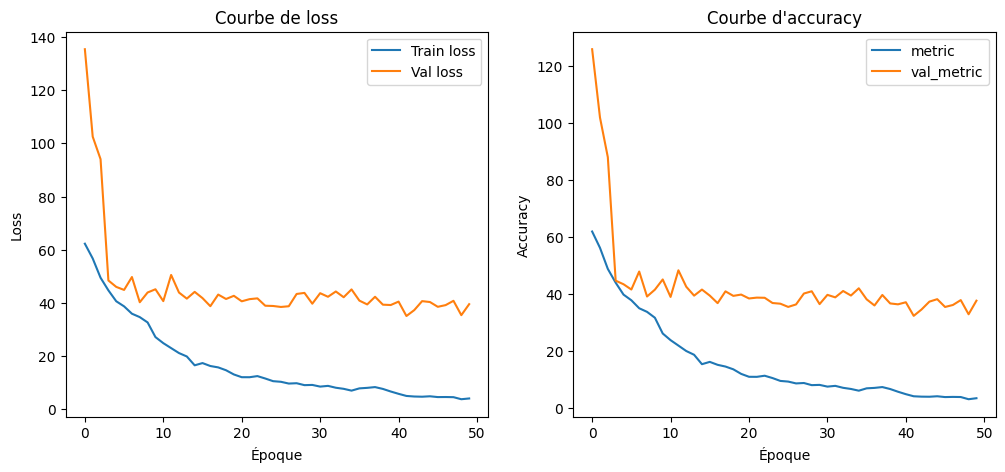

In [19]:
import matplotlib.pyplot as plt

# Affiche la loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.title('Courbe de loss')
plt.legend()

print(str(history.history.keys()))

# Affiche l’accuracy
plt.subplot(1,2,2)
plt.plot(history.history['metric'], label='metric')
plt.plot(history.history['val_metric'], label='val_metric')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.title('Courbe d\'accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Moteur centre prédit : x = 145.7, y = 81.9
129.75
103.5


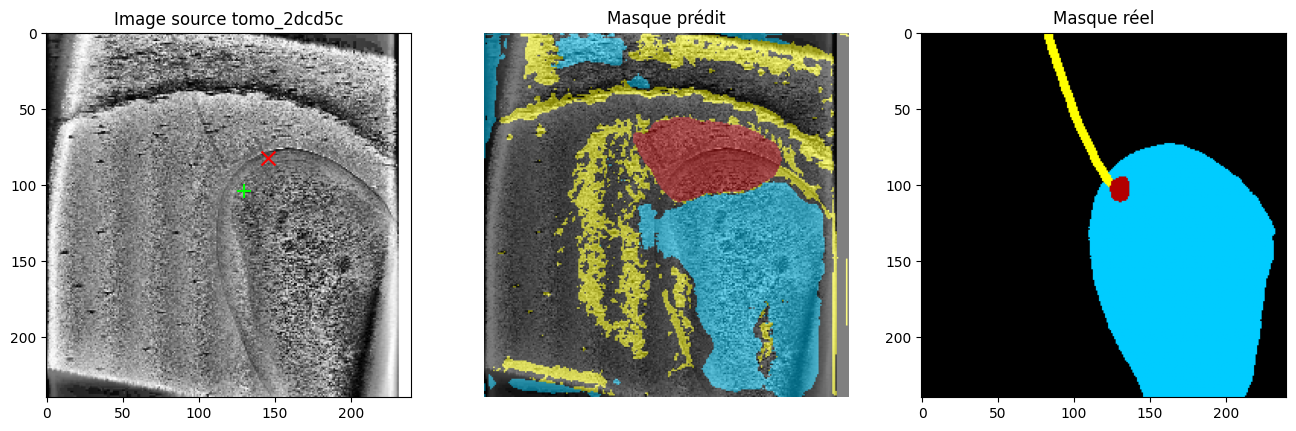

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

i = 5  # Numéro de l’image à tester

data = data_test

# Prédire le masque
pred = model.predict(np.expand_dims(data["X"][i], axis=0))  # shape: (1, H, W, 4)
mask_pred = np.argmax(pred[0], axis=-1)  # shape: (H, W)

# Coordonnées prédites "moteur"
ys, xs = np.where(mask_pred == 3)
if len(xs) > 0:
    x_center = np.mean(xs)
    y_center = np.mean(ys)
    print(f"Moteur centre prédit : x = {x_center:.1f}, y = {y_center:.1f}")
else:
    print("Aucune zone moteur détectée")
    x_center, y_center = None, None

# Colormap personnalisé : [fond, bactérie, flagelle, moteur]
cmap = ListedColormap([
    [0, 0, 0],        # fond (noir)
    [0, 0.8, 1.0],    # bactérie (bleu clair)
    [1, 1, 0],        # flagelle (jaune)
    [0.7, 0, 0]       # moteur (rouge foncé)
])

# Affichage superposé
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.title(f'Image source {data["tomo_ids"][i]}')
print(data["motor_xy"][i][0])
print(data["motor_xy"][i][1])
plt.scatter(data["motor_xy"][i][0], data["motor_xy"][i][1], c='lime', s=100, marker='+', label='Réel')
if x_center is not None:
    plt.scatter(x_center, y_center, c='red', s=100, marker='x', label='Prévu')
plt.imshow(data["X"][i].squeeze(), cmap='gray')

plt.subplot(1,3,2)
plt.title("Masque prédit")
plt.imshow(data["X"][i].squeeze(), cmap='gray')

plt.imshow(mask_pred, cmap=cmap, vmin=0, vmax=3, alpha=0.5)

plt.axis('off')
#plt.show()

plt.subplot(1,3,3)
plt.imshow(data["Y"][i], cmap=cmap, vmin=0, vmax=3)
plt.title("Masque réel")
plt.show()


In [20]:
not_detected = 0
all_distances = []

for i in range(len(data_test["X"])):
    pred = model.predict(np.expand_dims(data_test["X"][i], axis=0))
    mask_pred = np.argmax(pred[0], axis=-1)
    ys, xs = np.where(mask_pred == 3)
    if len(xs) > 0:
        x_pred = np.mean(xs)
        y_pred = np.mean(ys)
    else:
        x_pred, y_pred = np.nan, np.nan
        not_detected += 1
    x_gt, y_gt = data_test["motor_xy"][i]
    # if IMG_SIZE_ORIG != IMG_SIZE:
    #     x_gt *= IMG_SIZE / IMG_SIZE_ORIG
    #     y_gt *= IMG_SIZE / IMG_SIZE_ORIG
    d = np.sqrt((x_pred - x_gt)**2 + (y_pred - y_gt)**2) if not np.isnan(x_pred) else np.nan
    all_distances.append(d)

for i, d in enumerate(all_distances):
    print(f"Image {i} : {'{:.2f}'.format(d) if not np.isnan(d) else 'ND'}")

if np.any(~np.isnan(all_distances)):
    print(f"Distance moyenne : {np.nanmean(all_distances):.2f} pixels")
else:
    print("Aucune prédiction moteur sur le test !")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━

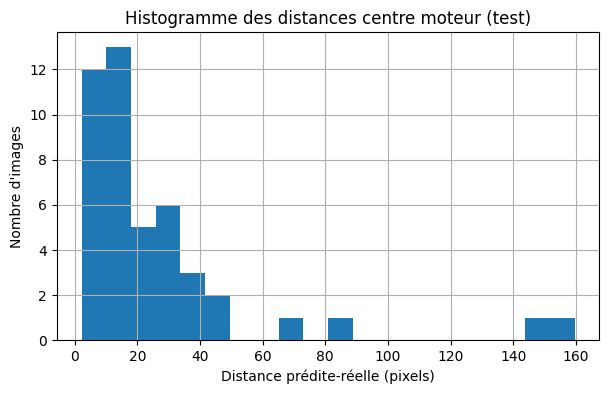

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrer les distances valides (non NaN)
distances_valides = [d for d in all_distances if not np.isnan(d)]

plt.figure(figsize=(7,4))
plt.hist(distances_valides, bins=20)
plt.xlabel('Distance prédite-réelle (pixels)')
plt.ylabel('Nombre d\'images')
plt.title('Histogramme des distances centre moteur (test)')
plt.grid(True)
plt.show()


In [11]:
model.save("unet_vgg16_multiclass_26.55px.h5")
model.save("unet_vgg16_multiclass_26.55px.keras")

In [26]:
from tensorflow.keras.models import load_model
model = load_model("unet_vgg16_multiclass_26.55px.keras", compile=False)
model.compile(
    optimizer='adam',
    loss=sparse_focal_loss_with_distance(
        alpha=[0.1, 0.2, 6.0, 5.5], gamma=2.0, lambda_distance=1.0, class_motor=3
    ),
    metrics=[motor_distance_metric(class_motor=3)]
)

In [45]:
#!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 18.5 MB/s eta 0:00:00


In [27]:
import mlflow
from sklearn.metrics import fbeta_score

mlflow.set_tracking_uri("http://34.79.119.176:5000")

mlflow.set_experiment("pierrero_experiment_colab")  # créé si inexistant

with mlflow.start_run():

    # Enregistrer le modèle
    mlflow.tensorflow.log_model(model, artifact_path="model")

    # Enregistrer des métriques
    loss, distance = model.evaluate(data_test["X"], data_test["Y"], verbose=0)
    mlflow.log_metric("test_loss", loss)
    mlflow.log_metric("test_distance", distance)

    # mlflow.log_param("model_architecture", "Xception")
    # mlflow.log_param("epochs", 200)
    # mlflow.log_param("batch_size", 32)
    # mlflow.log_param("early_stopping", True)
    # mlflow.log_param("loss_function", model.loss)
    # mlflow.log_param("optimizer", type(model.optimizer).__name__)
    # mlflow.log_param("learning_rate", model.optimizer.learning_rate.numpy())

    # y_pred = model.predict(X_test)

    # # Si y_pred est un vecteur de probabilités (ex : pour une classe binaire)
    # y_pred_labels = (y_pred > 0.5).astype(int)

    # fbeta = fbeta_score(y_test, y_pred_labels, beta=2)

    # mlflow.log_metric("test_fbeta", fbeta)

2025/06/10 13:14:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/06/10 13:14:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpv79l4twk/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/06/10 13:14:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run aged-robin-224 at: http://34.79.119.176:5000/#/experiments/8/runs/fcaa4e2b1d574cc1beea21aa251ce7f2
🧪 View experiment at: http://34.79.119.176:5000/#/experiments/8
